In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds #Descargar el set de datos de Zalando
datos, metadatos=tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_pruebas=datos['train'], datos['test']
nombres_clases=metadatos.features['label'].names

#Normalizar los datos (pasar de 0-255 a 0-1)
def normalizacion (imagenes, etiquetas):
    imagenes=tf.cast(imagenes, tf.float32)
    imagenes /=255.0
    return imagenes, etiquetas

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.L84F8B_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.L84F8B_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
#Normalizar los datos de entrenamiento y pruebas
datos_entrenamiento=datos_entrenamiento.map(normalizacion)
datos_pruebas=datos_pruebas.map(normalizacion)

#Agregar datos a cache (entrenamiento mas rapido)
datos_entrenamiento=datos_entrenamiento.cache()
datos_pruebas=datos_pruebas.cache()


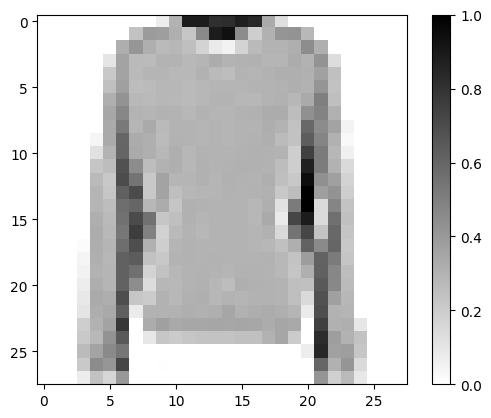

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#Mostrar una imagen de los datos de pruebas
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen=imagen.numpy().reshape((28,28))
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
plt.figure(figsize=(10,10))


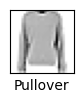

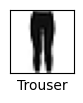

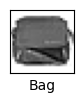

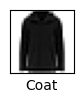

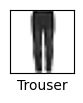

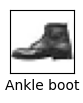

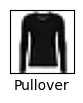

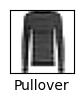

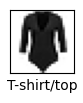

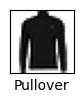

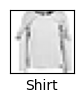

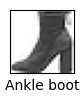

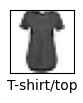

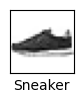

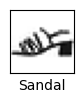

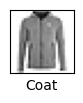

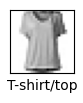

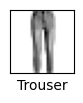

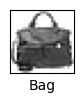

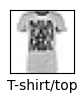

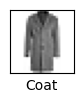

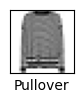

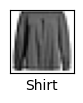

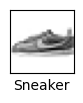

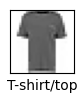

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):#no. de imagenes
    imagen=imagen.numpy().reshape((28,28))#pixeles
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen,cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
    plt.show()

In [ ]:
#Crear el modelo de la RNA
modelo=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

In [ ]:
num_ej_entrenamiento=metadatos.splits["train"].num_examples
num_ej_pruebas=metadatos.splits["test"].num_examples
print(num_ej_entrenamiento)
print(num_ej_pruebas)


60000
10000


In [ ]:
#Se dividen los datos en lotes o secciones
Tam_lote=32
datos_entrenamiento=datos_entrenamiento.repeat().shuffle(60000) #Datos de manera aleatoria
datos_entrenamiento=datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(Tam_lote)
datos_pruebas=datos_pruebas.batch(Tam_lote)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7559 - loss: 0.7018
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8575 - loss: 0.3943
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8727 - loss: 0.3536
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8782 - loss: 0.3293
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8841 - loss: 0.3151


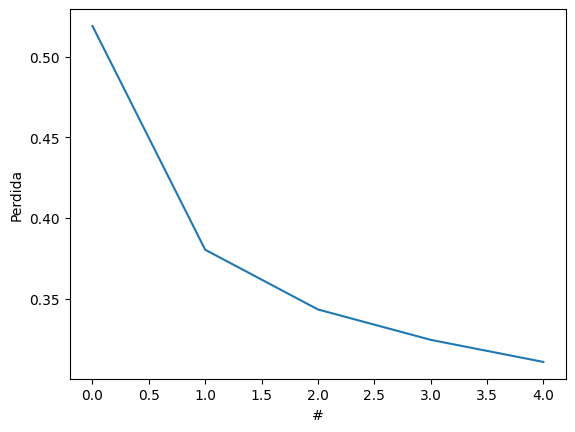

In [ ]:
#Entrenar la RNA
import math
historial=modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/Tam_lote))
plt.xlabel("#")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediccion: Coat


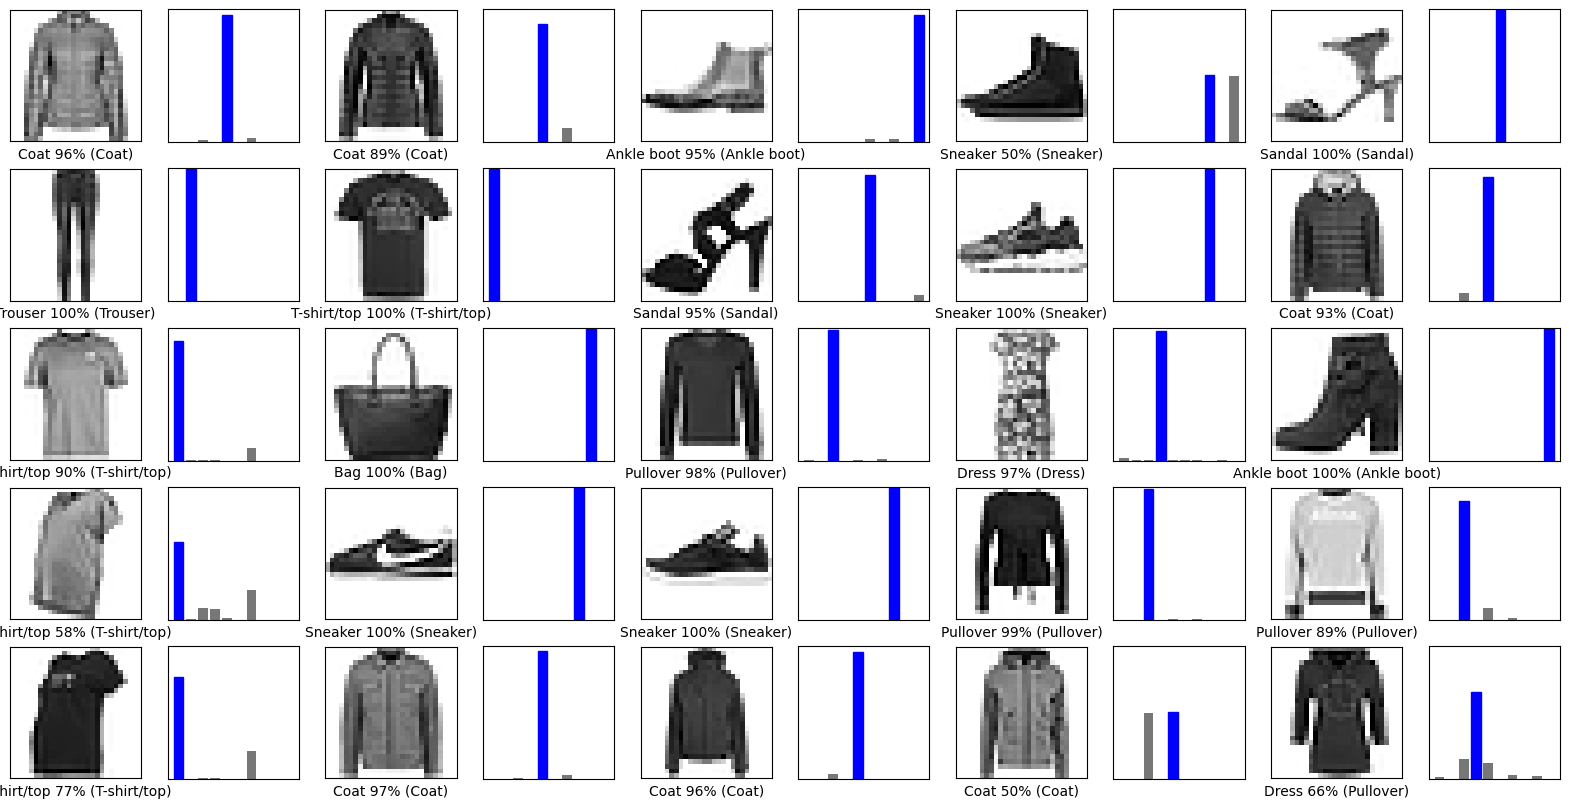

In [ ]:
import numpy as np
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba=imagenes_prueba.numpy()
    etiquetas_prueba=etiquetas_prueba.numpy()
    predicciones=modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img=arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    etiqueta_prediccion=np.argmax(arr_predicciones)
    if etiqueta_prediccion==etiqueta_real:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion], 100*np.max(arr_predicciones), nombres_clases[etiqueta_real], color=color))

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real=arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica=plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0,1])
    etiqueta_prediccion=np.argmax(arr_predicciones)
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_prediccion].set_color('blue')

filas=5
columnas=5
num_imagenes=filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i,predicciones,etiquetas_prueba)

imagen=imagenes_prueba[0]
imagen=np.array([imagen])
prediccion=modelo.predict(imagen)
print("Prediccion: "+ nombres_clases[np.argmax(prediccion[0])])